In [1]:
import extract

input_dir = input('Input directory:')
campaigns = extract.read_campaigns(input_dir)

Searching for campaigns in /home/katie/Downloads/slurm-1170809.
	Found 420 campaigns.
Checking campaigns.
	420 campaigns were valid.


In [2]:
from matplotlib import pyplot as plt
import report_util


def create_box_plot(data, subject, time, cmap, column='covered_branches', y_label='Covered Branches'):
    fuzzers = sorted(data['fuzzer'].unique())
    data = report_util.select(data, subject=subject, time=time)[['fuzzer', column]]
    plt.rcParams["font.family"] = 'sans-serif'
    fig, ax = plt.subplots(figsize=(8, 4))
    x = data.groupby(by=['fuzzer'])[column].apply(list).to_dict()
    box_plot = ax.boxplot([x[k] for k in fuzzers], patch_artist=True, labels=fuzzers, showcaps=False)
    for i, fuzzer in enumerate(fuzzers):
        color = cmap[fuzzer]
        ax.xaxis.get_ticklabels()[i].set_color(color)
        box_plot['boxes'][i].set(color=color, facecolor=color, alpha=.2)
        box_plot['medians'][i].set(color=color)
        box_plot['fliers'][i].set(markersize=3, marker='o', markeredgecolor=color)
    ax.set_xlabel('Fuzzer')
    ax.set_ylabel(y_label)
    ax.set_title(f'{subject.title()} at {time}')
    plt.xticks(size=8, rotation=90)
    return fig


def create_coverage_box_plots(data, times, cmap):
    plots = {}
    for subject in sorted(data['subject'].unique()):
        for time in times:
            plot = create_box_plot(data, subject, time, cmap)
            plots[(subject, time)] = plot
    return plots

Checking for coverage data: /home/katie/Downloads/slurm-1170809/coverage.csv.
	Coverage data found.
Checking for detections data: /home/katie/Downloads/slurm-1170809/detections.csv.
	Detections data found.


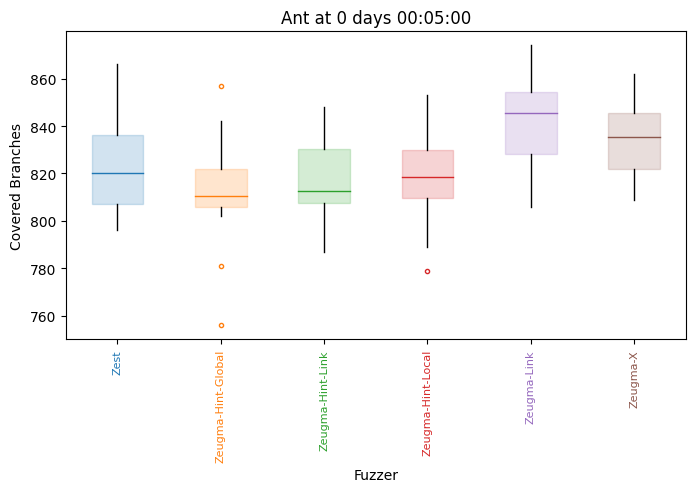

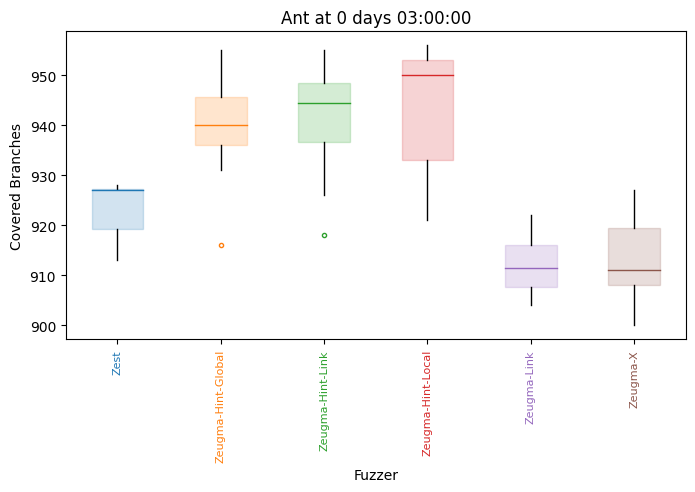

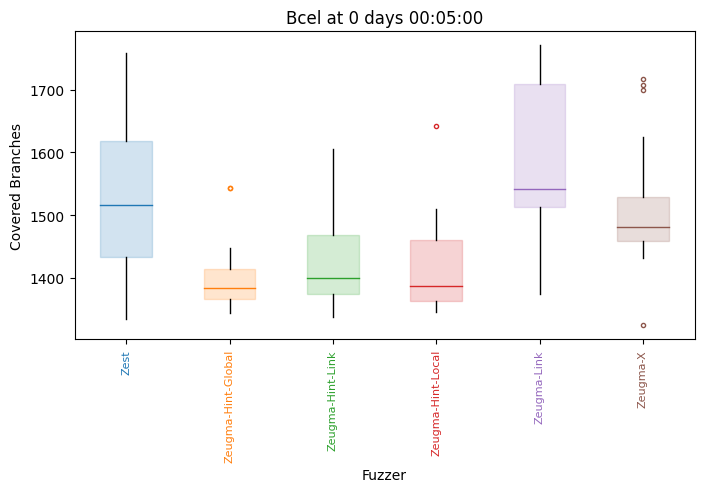

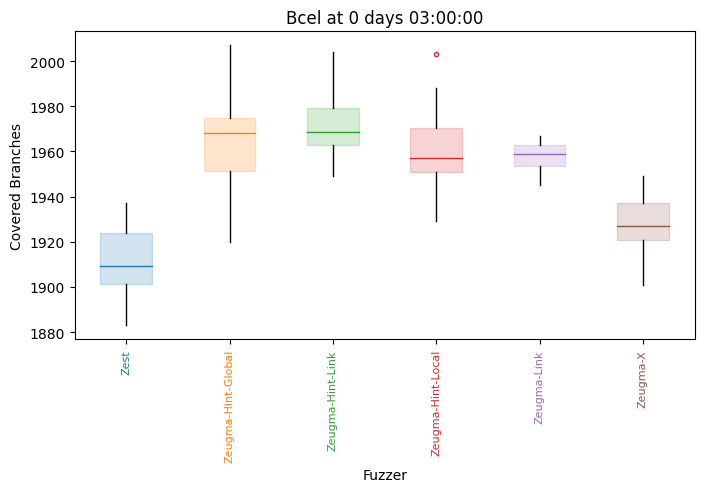

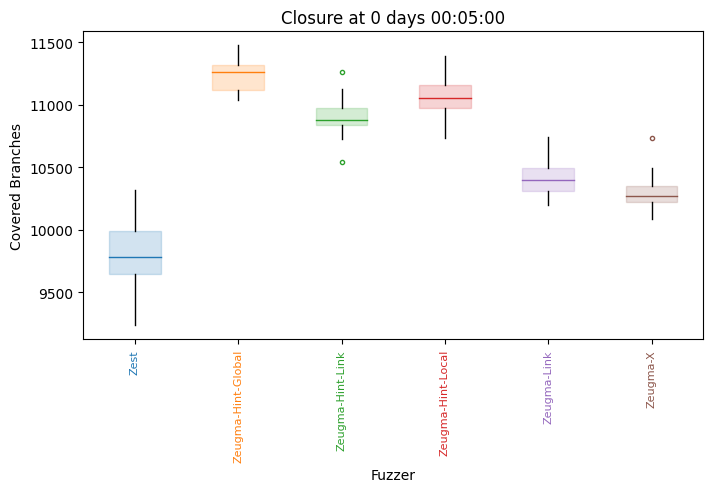

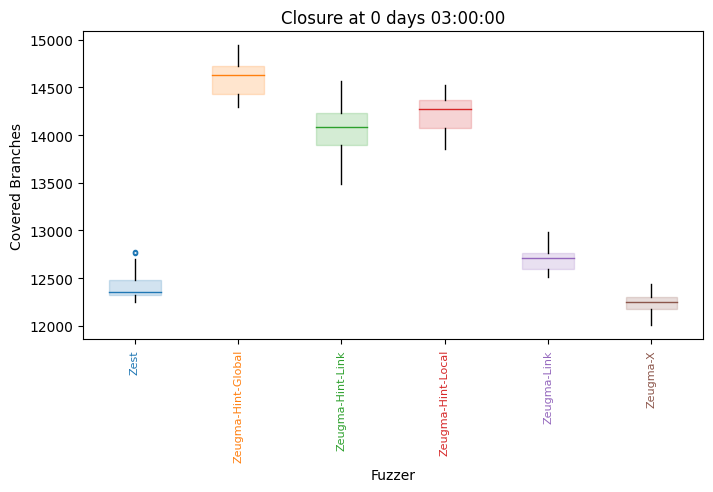

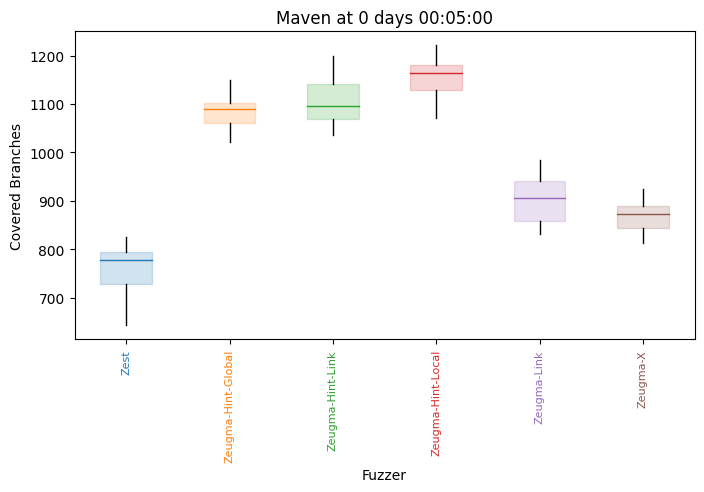

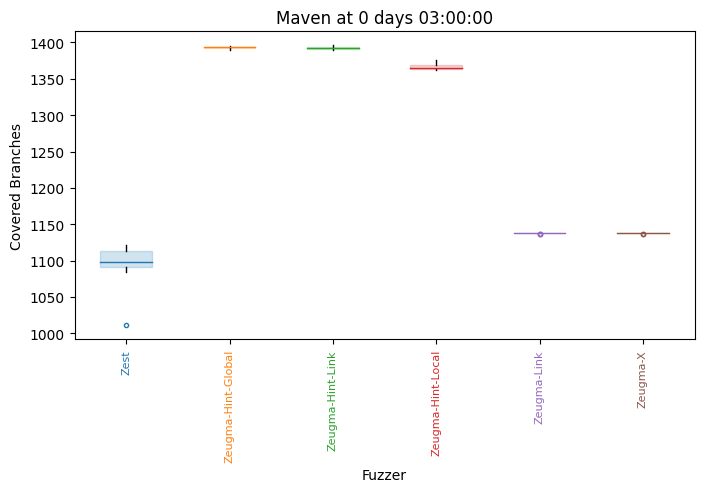

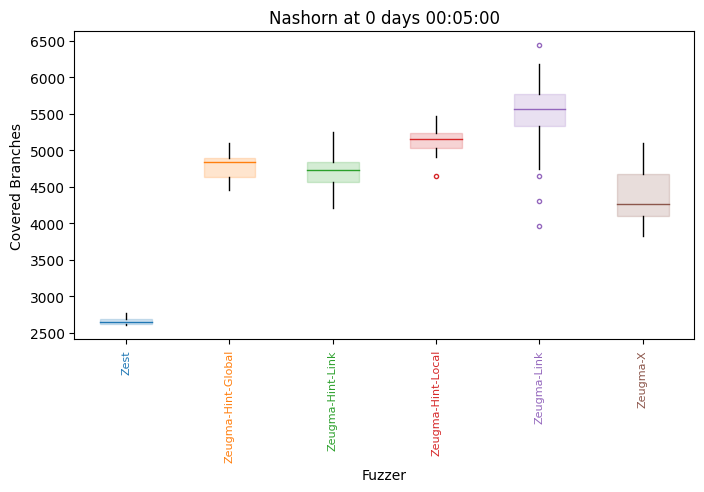

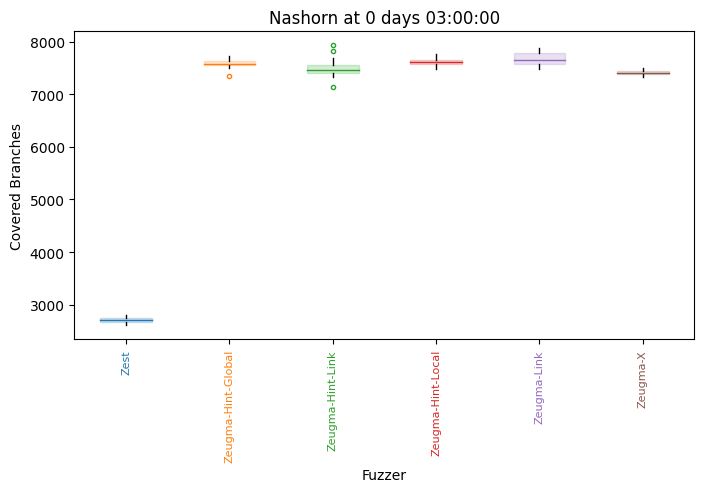

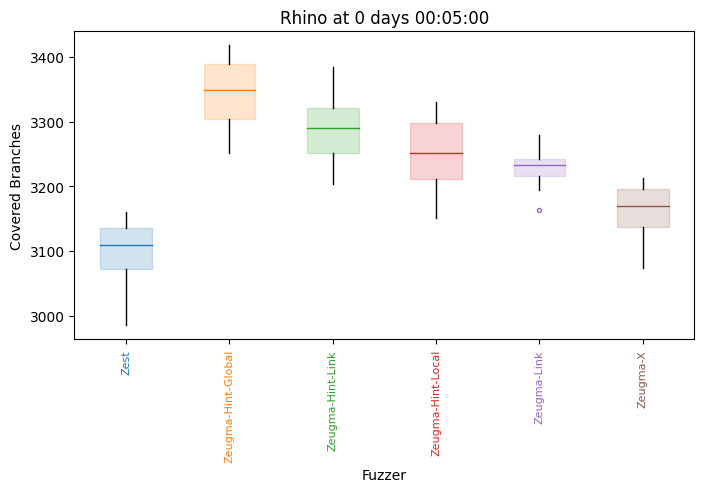

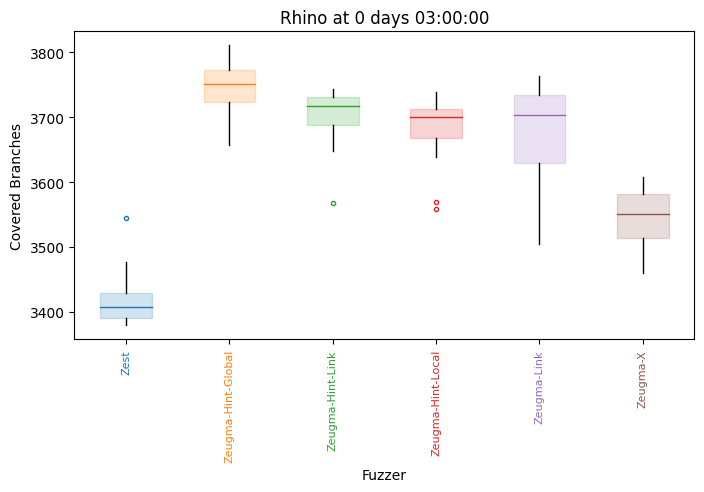

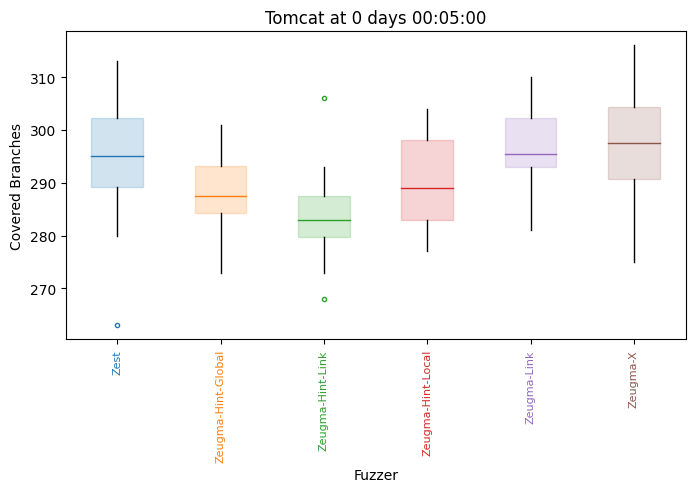

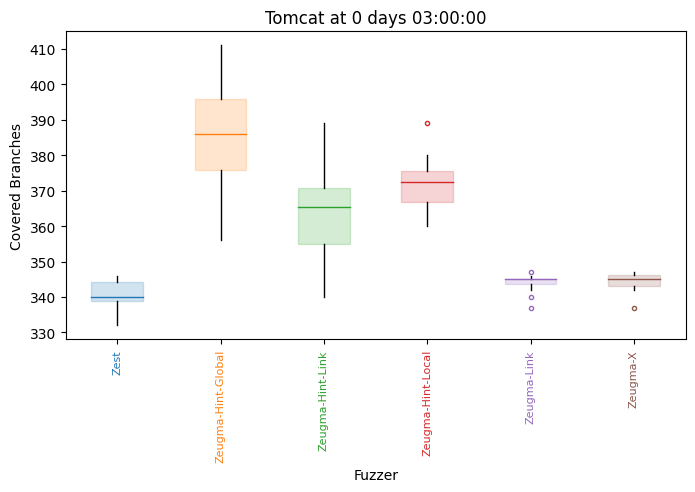

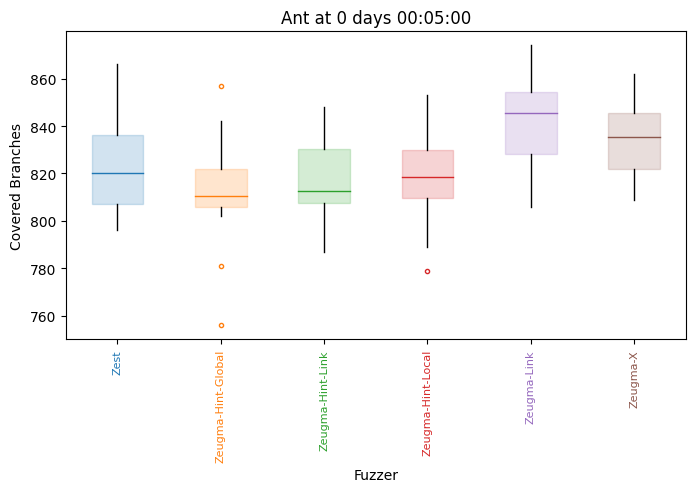

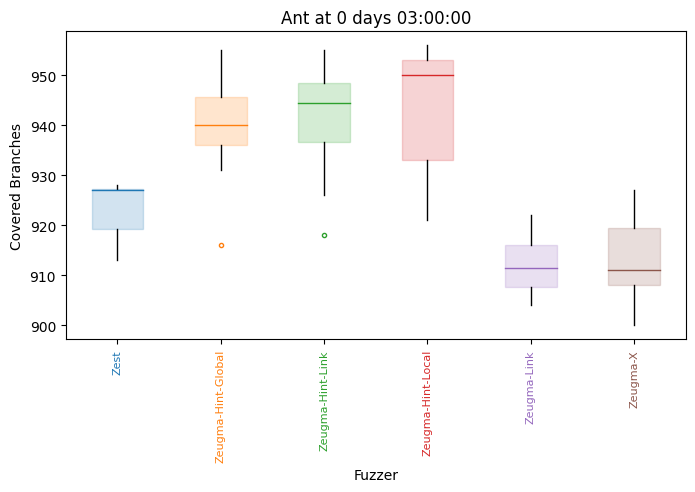

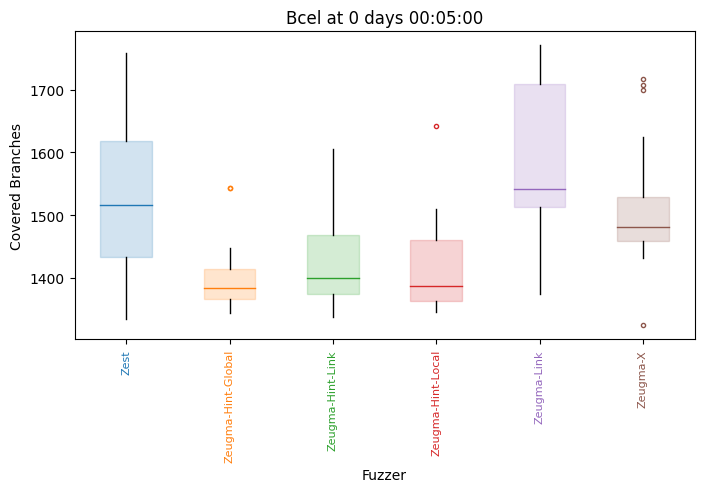

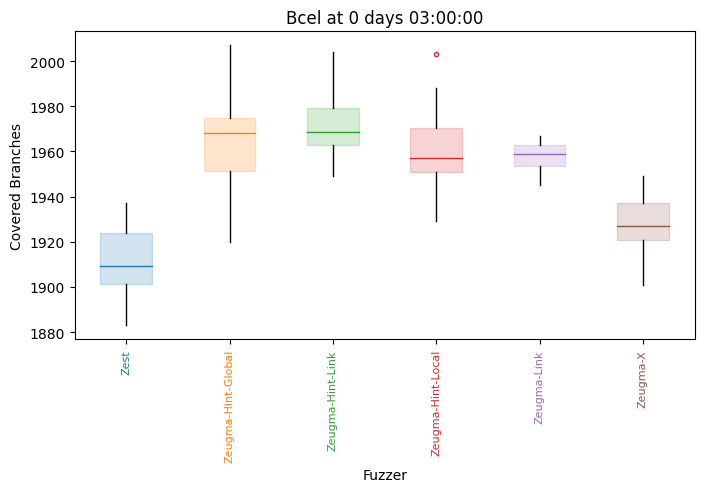

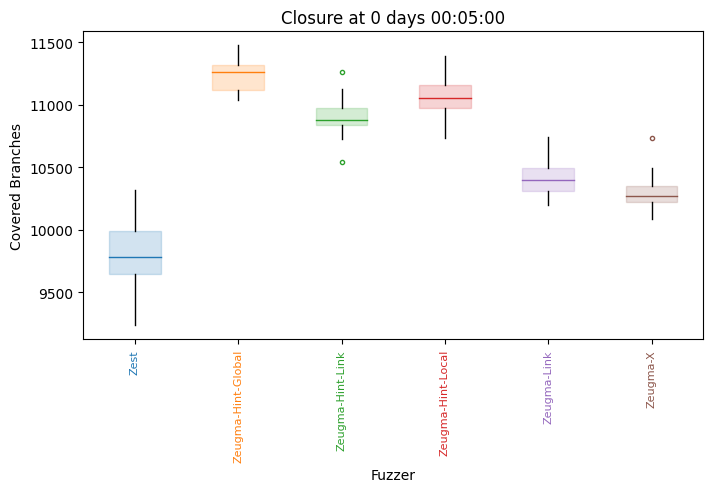

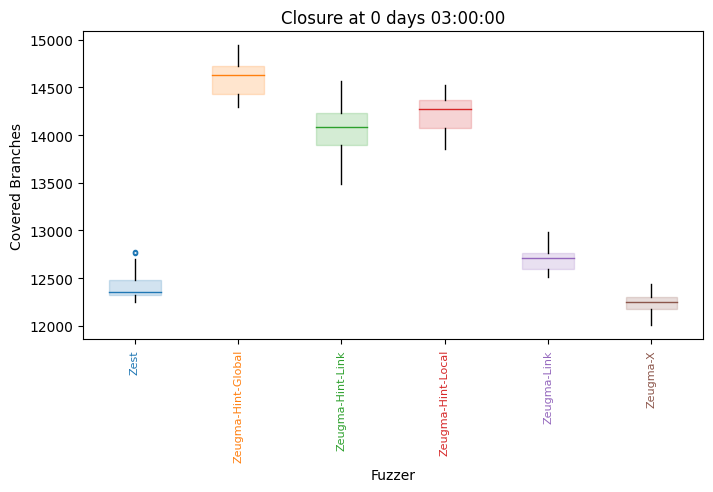

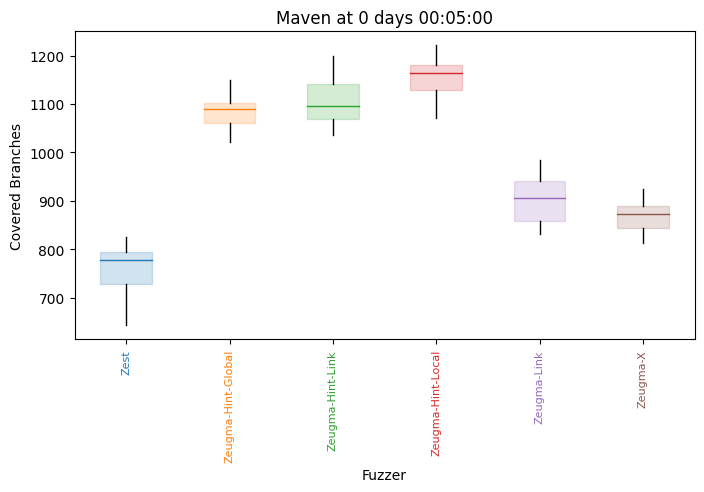

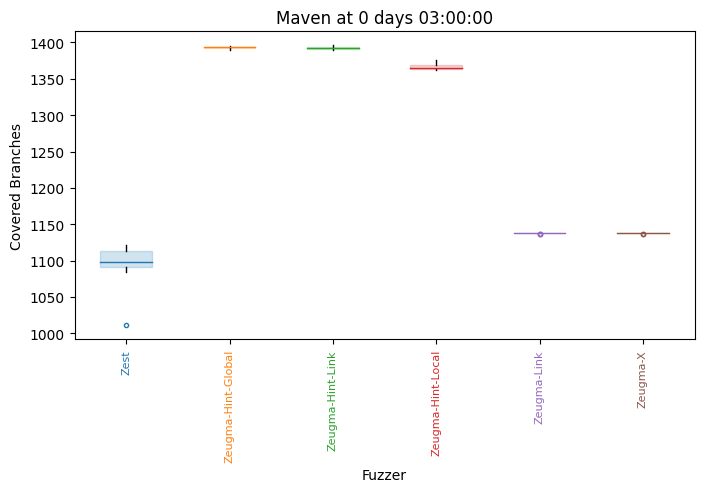

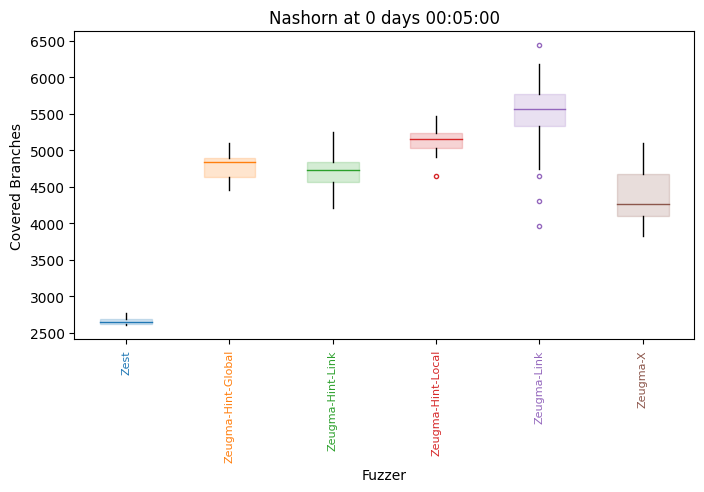

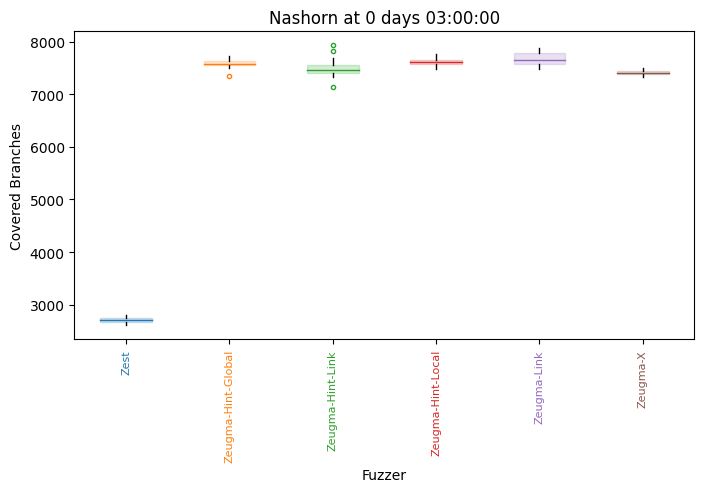

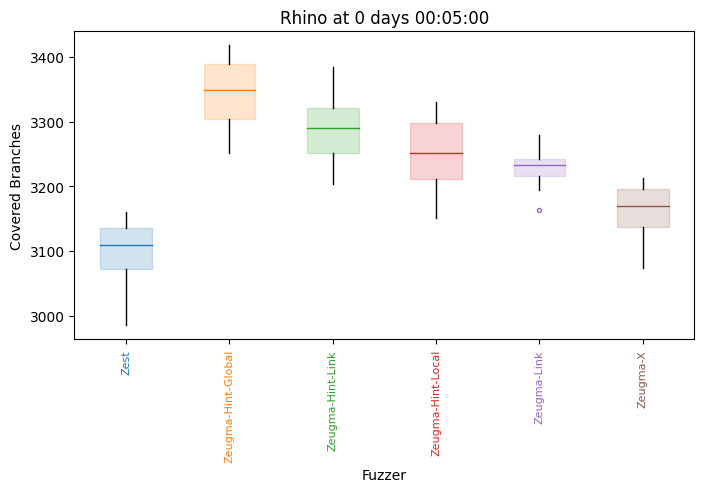

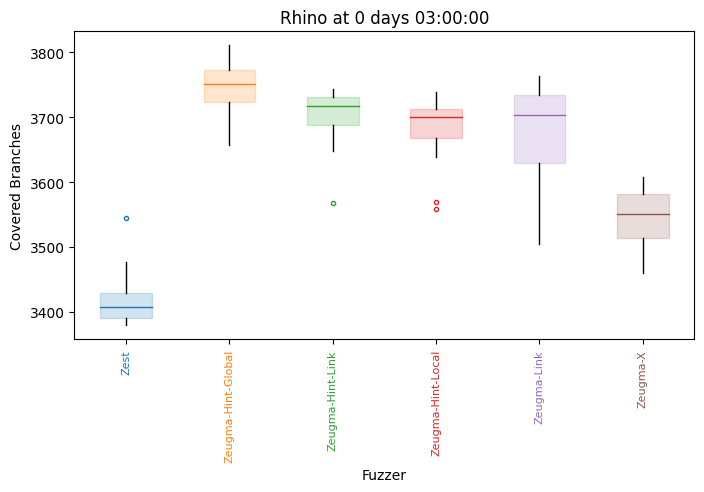

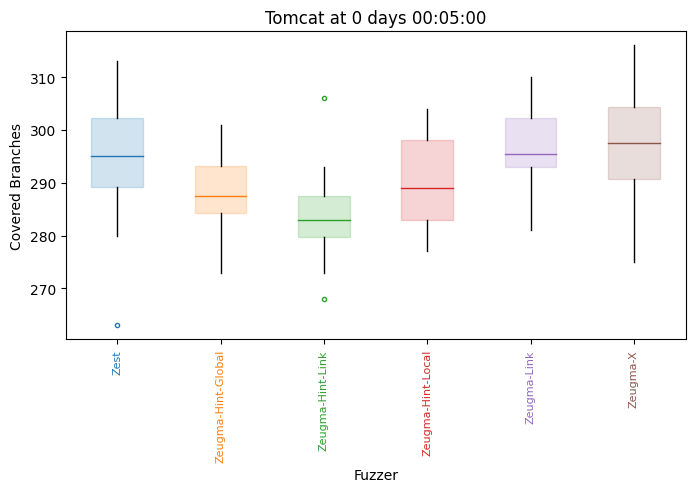

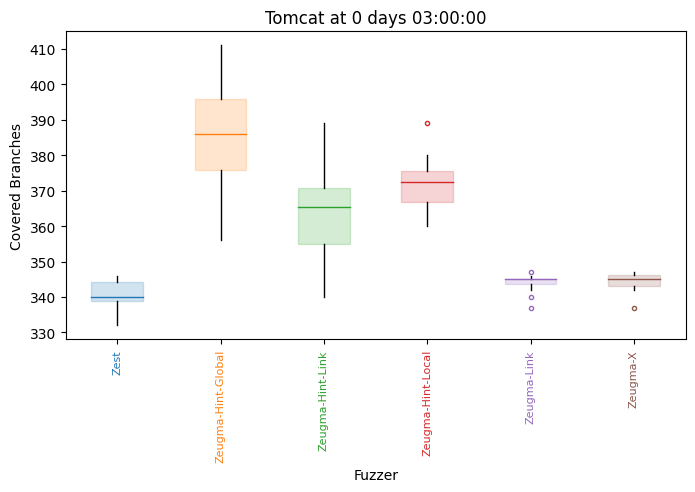

In [3]:
import pandas as pd
from report import find_dataset, append_base_data

included_fuzzers = ['Zeugma-X', 'Zeugma-Link', 'Zest']
times = [pd.to_timedelta(5, 'm'), pd.to_timedelta(3, 'h')]
coverage = find_dataset(input_dir, 'coverage')
detections = find_dataset(input_dir, 'detections')
if coverage is None or detections is None:
    coverage, detections = extract.extract_data(input_dir, input_dir, times)
coverage, detections = append_base_data(coverage, detections, included_fuzzers)
cmap = report_util.create_cmap(coverage, 'fuzzer')
plots = create_coverage_box_plots(coverage, times, cmap)
for k, v in plots.items():
    display(v)